In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import useful_functions as uf
import pandas as pd
import coin_circle_detector as ccd

In [2]:
folder = 'data'

images = [f for f in os.listdir(folder) if f.endswith('.jpg')]
img_files_filter = list(filter(lambda x: 'tr_' in x, images)) # None tr_005 tr_01 tr_02 tr_05 tr_1 tr_2
uf.sort_list_of_fs_by_ascending_number(img_files_filter, r_pattern='image_')
print(f'se va a entrenar con {len(img_files_filter)} imagenes ')

se va a entrenar con 95 imagenes 


## Obtencios radios

In [3]:
radios_monedas = {}
monedas = ['tr_005', 'tr_01', 'tr_02', 'tr_05', 'tr_1', 'tr_2']

for moneda_index in monedas:
    res = []
    img_filter = list(filter(lambda x: moneda_index in x, img_files_filter))
    for img_n in img_filter:
        _, _, circulos  = ccd.coins_detec_alg(f'{folder}/{img_n}', params={'dp':.5, 'param2':11}, vis_result=False)
        res.append(list(circulos[:,2]))
    radios_monedas[moneda_index] = sum(res, [])
    
rows = []
radio_values = []

for key, values in radios_monedas.items():
    for value in values:
        rows.append(key)
        radio_values.append(value)

radio_values_df = pd.DataFrame({'radio': radio_values})#, index = rows

print(radio_values_df)


     radio
0       30
1       31
2       31
3       33
4       30
..     ...
447     40
448     38
449     39
450     41
451     39

[452 rows x 1 columns]


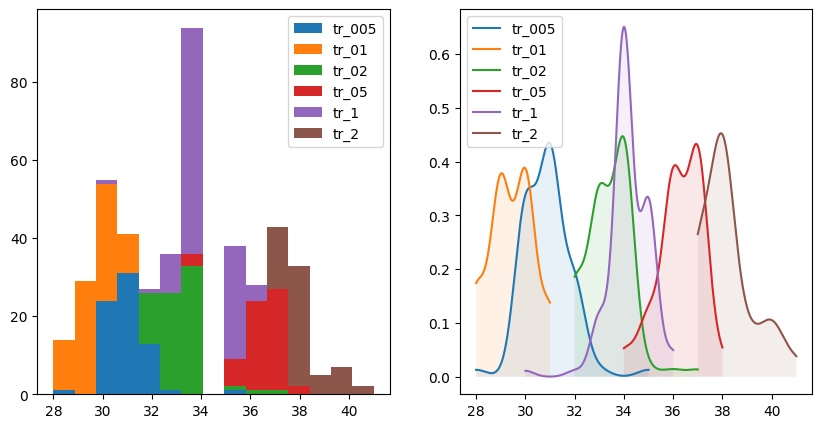

In [4]:
# radio 5 cents	10.625 (2)
# radio 10 cents	9.875 (1)
# radio 20 cents	11.125 (3)
# radio 50 cents	12.125 (5)
# radio 1 euro	11.625 (4)
# radio 2 euros	12.875 (6)

from scipy.stats import gaussian_kde

f, (ax1, ax2) = plt.subplots(1,2 ,figsize=(10,5))
ax1.hist(radios_monedas.values(), bins=15, stacked=True, label=list(radios_monedas.keys()))
ax1.legend()
for mnd in radios_monedas:
    data = radios_monedas[mnd]
    kde = gaussian_kde(data, bw_method='silverman')
    x = np.linspace(min(data), max(data), 1000)
    y = kde(x)
    ax2.plot(x, y, label=mnd)
    ax2.fill_between(x, y, alpha=0.1)
ax2.legend()
plt.show()

## Obtención hue anillos

El codigo de abajo ve cómo coge los colores del aro

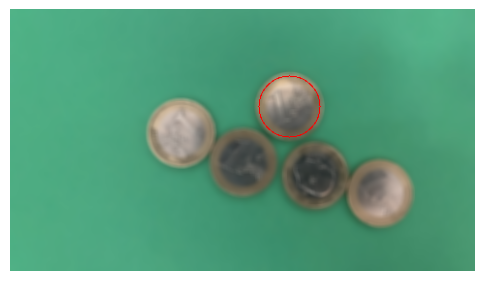

21


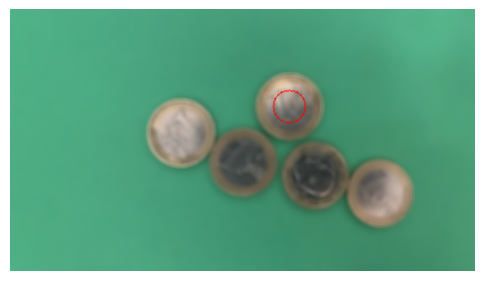

14
7
--- otra mondeda ----


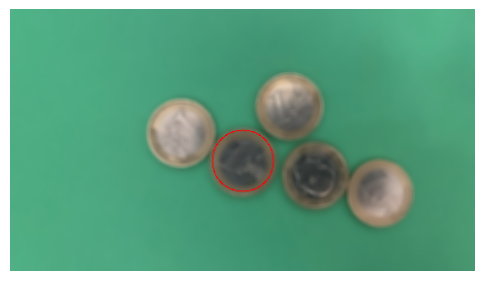

21


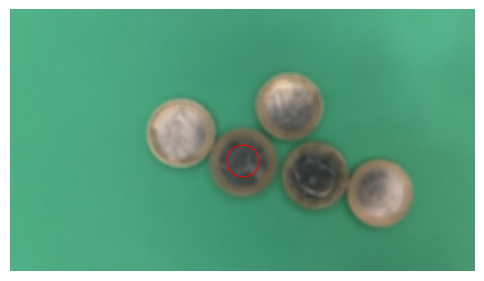

90
69
--- otra mondeda ----


In [5]:

grosor = 1
img_n = 'tr_1_image_2.jpg'

_, _, circulos  = ccd.coins_detec_alg(f'{folder}/{img_n}', params={'dp':.5, 'param2':11}, vis_result=False)
imagen = cv2.imread(f'{folder}/{img_n}')
imagen_pre = ccd.image_prepros(imagen)

for cir in circulos[:2]:
    hue_medio_1 = uf.hue_promedio_anillo(imagen_pre, cir[0], cir[1], int(cir[2]-cir[2]*0.05), grosor, visualizar=True)
    hue_medio_1 = int(hue_medio_1.mode[0])
    print(hue_medio_1)
    
    hue_medio_2 = uf.hue_promedio_anillo(imagen_pre, cir[0], cir[1], int(cir[2]-cir[2]*0.5), grosor, visualizar=True)
    hue_medio_2 = int(hue_medio_2.mode[0])
    print(hue_medio_2)
    print(abs(hue_medio_1 - hue_medio_2))
    print('--- otra mondeda ----')

In [6]:

grosor = 1      # Grosor del anillo

hues_aros = {}
monedas = ['tr_005', 'tr_01', 'tr_02', 'tr_05', 'tr_1', 'tr_2']

for moneda_index in monedas:
    res = []
    img_filter = list(filter(lambda x: moneda_index in x, img_files_filter))
    for img_n in img_filter:
        
        _, _, circulos  = ccd.coins_detec_alg(f'{folder}/{img_n}', params={'dp':.5, 'param2':11}, vis_result=False)

        imagen = cv2.imread(f'{folder}/{img_n}')
        imagen_pre = ccd.image_prepros(imagen)
        
        for cir in circulos:
            hue_medio_1 = uf.hue_promedio_anillo(imagen_pre, cir[0], cir[1], int(cir[2]-cir[2]*0.2), grosor, visualizar=False)
            hue_medio_1 = int(hue_medio_1.mode[0])
            
            hue_medio_2 = uf.hue_promedio_anillo(imagen_pre, cir[0], cir[1], int(cir[2]-cir[2]*0.7), grosor, visualizar=False)
            hue_medio_2 = int(hue_medio_2.mode[0])
            res.append(abs(hue_medio_1 - hue_medio_2))
    hues_aros[moneda_index] = res
    
rows = []
hue_values = []

for key, values in hues_aros.items():
    for value in values:
        rows.append(key)
        hue_values.append(value)

hue_values_df = pd.DataFrame({'hue_values': hue_values})#, index = rows

print(hue_values_df)

     hue_values
0             0
1             1
2             1
3             1
4             1
..          ...
447           2
448           2
449           3
450           4
451           3

[452 rows x 1 columns]


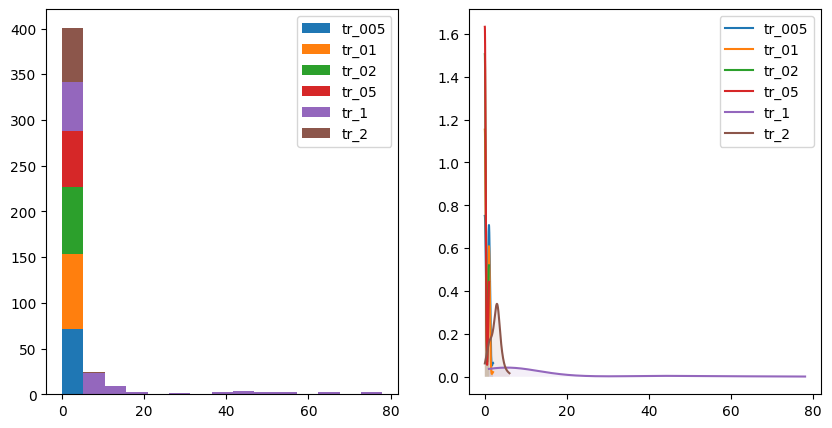

In [7]:
f, (ax1, ax2) = plt.subplots(1,2 ,figsize=(10,5))
ax1.hist(hues_aros.values(), bins=15, stacked=True, label=list(hues_aros.keys()))
ax1.legend()
for mnd in hues_aros:
    data = hues_aros[mnd]
    kde = gaussian_kde(data, bw_method='silverman')
    x = np.linspace(min(data), max(data), 1000)
    y = kde(x)
    ax2.plot(x, y, label=mnd)
    ax2.fill_between(x, y, alpha=0.1)
ax2.legend()
plt.show()

## Obtención colores promedio circulos

In [8]:
colores_monedas = {}
monedas = ['tr_005', 'tr_01', 'tr_02', 'tr_05', 'tr_1', 'tr_2']
hsv_labels = ['h', 's','v']

for moneda_index in monedas:
    colores = []
    img_filter = list(filter(lambda x: moneda_index in x, img_files_filter))
    for img_n in img_filter:
        img = cv2.imread(f'{folder}/{img_n}')
        imgPre = ccd.image_prepros(img)
        
        _, _, circulos  = ccd.coins_detec_alg(f'{folder}/{img_n}', params={'dp':.5, 'param2':11}, vis_result=False)
        for cir in circulos:
            imgPre_ = imgPre.copy()
            color = uf.get_color_from_circle(imgPre_, cir[:2], cir[2], vis= False)
            valor_h = cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_BGR2HSV)[0][0][0]
            valor_s = cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_BGR2HSV)[0][0][1]
            valor_v = cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_BGR2HSV)[0][0][2]
            colores.append([valor_h, valor_s, valor_v])
    colores_monedas[moneda_index] = colores

rows = []
h_values = []
s_values = []
v_values = []

for key, values in colores_monedas.items():
    for h, s, v in values:
        rows.append(key)
        h_values.append(h)
        s_values.append(s)
        v_values.append(v)

# Crear DataFrame
colores_monedas_df = pd.DataFrame({'id': rows, 'h': h_values, 's': s_values, 'v': v_values})

print(colores_monedas_df)



         id   h    s    v
0    tr_005  14  126   89
1    tr_005  15  147   87
2    tr_005  15   90  113
3    tr_005  17   99   93
4    tr_005  15  114   92
..      ...  ..  ...  ...
447    tr_2  19   50  162
448    tr_2  21   47  113
449    tr_2  17   45  175
450    tr_2  20   46  165
451    tr_2  20   48  133

[452 rows x 4 columns]


In [9]:
pd.concat([colores_monedas_df, hue_values_df, radio_values_df], axis=1).to_csv('data_entrenamiento.csv', index=False)
